<a href="https://colab.research.google.com/github/mladbago/podstawy_sztucznej_inteligencji/blob/main/Z03_E_kernel_density_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zad.

* Wykona kenrlową estymację gęstości 2D.
* Dobierz odpowiednią szerokość okna.

In [2]:
import numpy as np
import matplotlib.pyplot as pl
import scipy.stats as st
from sklearn import cluster, datasets

n_samples = 100
data, data_y = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)

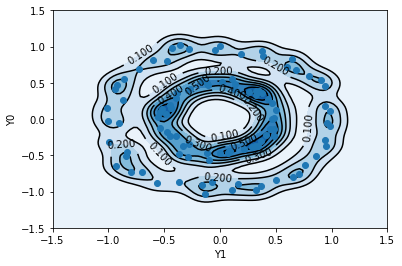

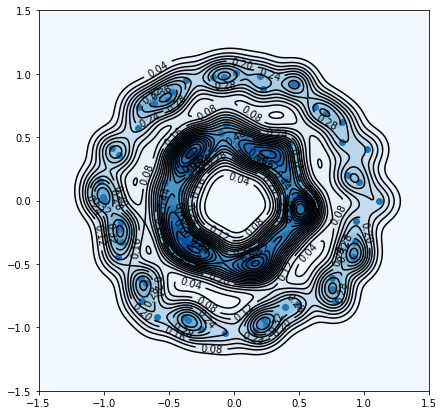

In [13]:
from sklearn.neighbors import KernelDensity

xmin, xmax = -1.5, 1.5 
ymin, ymax = -1.5, 1.5
xx, yy = np.mgrid[xmin:xmax:500j, ymin:ymax:500j]
xy = np.vstack([xx.ravel(), yy.ravel()]).T

kde = KernelDensity(bandwidth=0.1, kernel='gaussian')
kde.fit(data)
density = np.exp(kde.score_samples(xy))
density = density.reshape(xx.shape)

fig = pl.figure()
fig.set_size_inches(7, 7)
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

cfset = ax.contourf(xx, yy, density, cmap='Blues', levels=20)
cset = ax.contour(xx, yy, density, colors='k', levels=20)
ax.clabel(cset, inline=1, fontsize=10)

pl.scatter(data[:, 0], data[:, 1])

pl.show()